In [16]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
from scipy.stats import norm

def convert_old(df):
    df['Percept']=[float(x.replace('\xa0', '').replace(',', '')) if type(x) == str else float(x) for x in df.Percept]
    df['Sensory']=[float(x.replace('\xa0', '').replace(',', '')) if type(x) == str else float(x) for x in df.Sensory]
    df['Time']=[float(x.replace(",", ".").replace('\xa0', ''))  if type(x) == str else float(x) for x in df.Time]
    df = df[df.Percept.notna()]
    #df = df[df.Percept > 100000]
    #df = df[df.Age<100]
    #df = df[df.Time<2000]
    if "Период" in df.columns:
        df = df.rename(columns={"Период":"Stamp"})
        df.Stamp = pd.to_datetime(df.Stamp, format="%d.%m.%Y %H:%M:%S")
    else:
        df = df.rename(columns={"Period":"Stamp"})
        df.Stamp = pd.to_datetime(df.Stamp, format="%m/%d/%Y %H:%M:%S %p")
    df = df.sort_values('Stamp')
    #df['Try'] = df.groupby(['User']).cumcount()+1
    return df

def convert_new(df):
    df['Percept']=[float(x.replace('\xa0', '').replace(',', '')) if type(x) == str else float(x) for x in df.Percept]
    df['Sensory']=[float(x.replace('\xa0', '').replace(',', '')) if type(x) == str else float(x) for x in df.Sensory]
    df['Time']=[float(x.replace(",", "").replace('\xa0', ''))  if type(x) == str else float(x) for x in df.Time]
    df = df[df.Percept.notna()]
    #df = df[df.Percept > 100000]
    #df = df[df.Age<100]
    #df = df[df.Time<2000]
    if "Период" in df.columns:
        df = df.rename(columns={"Период":"Stamp"})
        df.Stamp = pd.to_datetime(df.Stamp, format="%d.%m.%Y %H:%M:%S")
    else:
        df = df.rename(columns={"Period":"Stamp"})
        df.Stamp = pd.to_datetime(df.Stamp, format="%m/%d/%Y %H:%M:%S %p")
    df = df.sort_values('Stamp')
    #df['Try'] = df.groupby(['User']).cumcount()+1
    return df

dfs = (pd.read_csv("colortest_v2.csv", delimiter='\t'),
      pd.read_csv("colortest_v4.txt", delimiter='\t'))
dfs=[convert_old(dfs[0]), convert_new(dfs[1])]

## Outliers removal

10200 результатов с непустым Percept.

In [17]:
df=dfs[1]
df

,Stamp,User,Device,os,Age,Version,Red,Green,Blue,Percept,Sensory,Time,Ts,Year
0,2023-08-02 01:12:40,rfeNWosjqLh9mzkWV85PsuocCQo2,"iPhone iPhone15,2",16.6,40,1,0.688211,0.652741,0.792092,4775204.0,10202078.0,511.321619,"1,690,938,760.5902991000","1,983"
1,2023-08-02 09:39:50,HZgKRoA6sYPE8a4AWWKGBD4tGAm1,"iPhone iPhone14,3",16.5.1,49,1,0.756792,0.766260,0.843424,7282764.0,12211263.0,220.490746,"1,691,012,390.2468119000","1,974"
2,2023-08-02 10:21:02,QlaF1CMypKRKkb6Xl6mq21beQnI2,"iPhone iPhone14,3",16.6,41,1,0.597093,0.716267,0.821352,2952482.0,11092242.0,348.539970,"1,691,014,862.8611178000","1,982"
24,2023-08-03 01:01:43,ylXF7P6ErDWOlhLplkAClaCmpt22,"iPhone iPhone14,2",16.5.1,43,1,0.713444,0.661853,0.785747,3313168.0,12971014.0,427.339942,"1,691,067,703.9608068000","1,980"
25,2023-08-03 01:06:47,m1HStSWcWyYeaaKqidNpZpAA5Oi1,"iPad iPad7,11",16.5.1,35,1,0.575492,0.569115,0.701584,1700498.0,9942691.0,222.571274,"1,691,068,007.4836988000","1,988"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10191,2024-01-11 11:21:31,KqeZU4rBiaXG64W52DneB8huBgd2,"iPhone iPhone12,1",17.1.2,19,1,0.651402,0.529590,0.579009,5500140.0,NaN,361.744060,"1,704,972,091.3466060000","2,005"
10192,2024-01-11 11:49:09,qXbwVn6LO0VHslzjWh0nal4HnTx2,"iPhone iPhone14,7",17.1.1,19,1,0.620651,0.383608,0.495649,1566763.0,NaN,194.239138,"1,704,973,749.8986769000","2,005"
10193,2024-01-11 12:12:20,2GQfwBTW1kRKN9T1hNlTzJqm8eY2,"iPhone iPhone16,1",17.2.1,41,1,0.687877,0.578909,0.638503,3368703.0,NaN,402.040751,"1,704,975,140.7093821000","1,983"
10194,2024-01-11 12:23:01,NfzN1XJpVWPCxZWpgoUJab0DW8G2,"iPhone iPhone12,8",17.2.1,19,1,0.637668,0.494668,0.589826,4461001.0,NaN,351.691388,"1,704,975,781.4512792000","2,005"


32


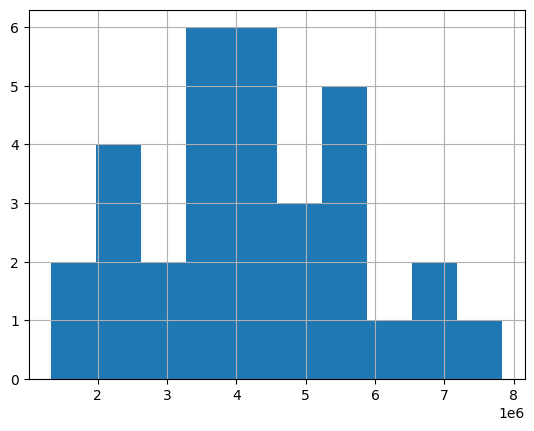

<Axes: >

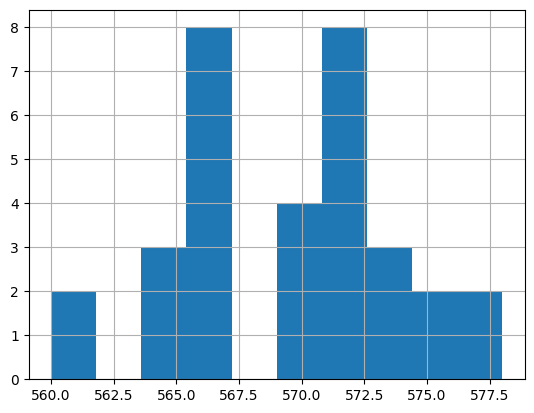

In [18]:
age_threshold=130
df_out_age = df[(df.Age>=age_threshold)]
print(len(df_out_age))
df_out_age.Percept.hist()
plt.show()
df_out_age.Age.hist()

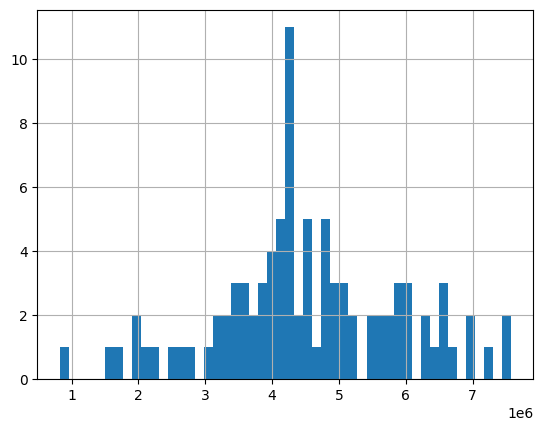

91

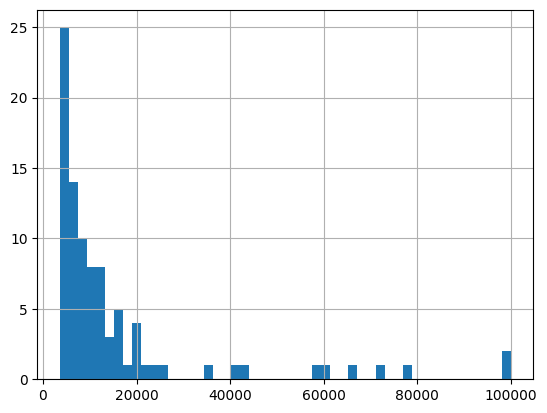

In [19]:
time_high_threshold = 3600
df_out_time = df[(df.Time>=time_high_threshold)]
df_out_time.Percept.hist(bins=50)
plt.show()
df_out_time.Time.hist(bins=50)
len(df_out_time)

count    1.020000e+04
mean     4.332340e+06
std      1.655964e+06
min      1.560000e+03
25%      3.204602e+06
50%      4.263151e+06
75%      5.395003e+06
max      1.324877e+07
Name: Percept, dtype: float64

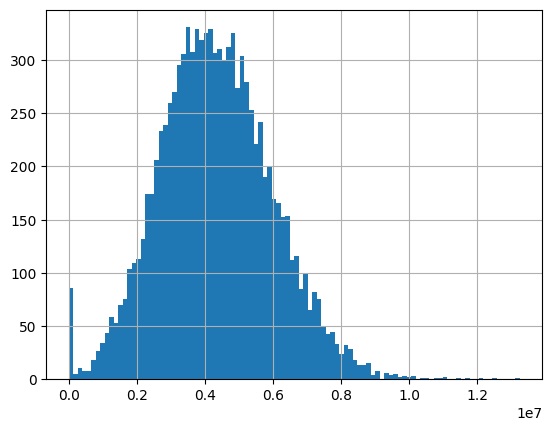

In [20]:
df.Percept.hist(bins=100)
df.Percept.describe()

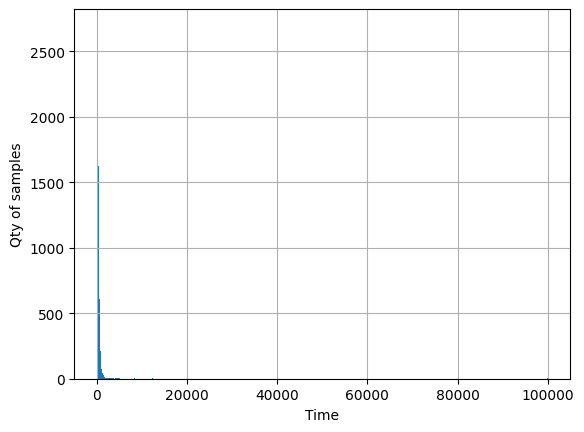

In [21]:
ax = df.Time.hist(bins=1000)
ax.set(xlabel='Time', ylabel='Qty of samples')
plt.savefig("time_with_outliers.pdf", bbox_inches='tight')

457


count    4.570000e+02
mean     2.699395e+06
std      1.909532e+06
min      1.560000e+03
25%      1.184249e+06
50%      2.700030e+06
75%      3.975520e+06
max      8.125062e+06
Name: Percept, dtype: float64

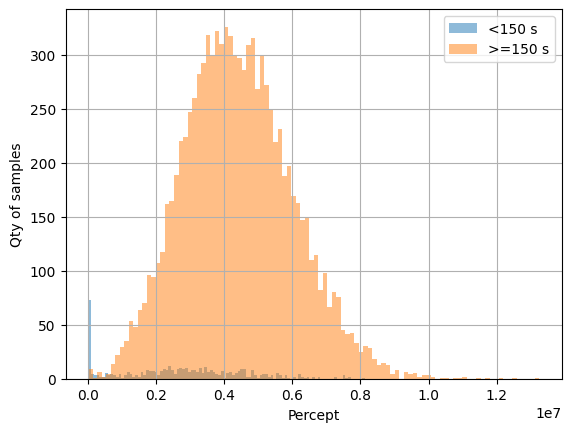

In [22]:
time_low_threshold=150
df[df.Time<time_low_threshold].Percept.hist(bins=100, alpha=0.5, label=f"<{time_low_threshold} s")
ax = df[df.Time>=time_low_threshold].Percept.hist(bins=100, alpha=0.5, label=f">={time_low_threshold} s")
ax.set(xlabel='Percept', ylabel='Qty of samples')
plt.legend()
plt.savefig("percept_less_greater_150.pdf", bbox_inches='tight')
print(len(df[df.Time<time_low_threshold]))
df[df.Time<time_low_threshold].Percept.describe()

In [23]:
print(f"""\
Выбрасываем испытания, c возрастом > {age_threshold}. Это полный нонсенс - у них возраст
{df_out_age.Age.min()}-{df_out_age.Age.max()} лет. Всего {len(df_out_age)} испатания,
Percept в них сравним с остальными.

Со временем прохождения меньше {time_low_threshold}.  Часто, это пользователи просто
нажимающее "Дальше" и создающие пик около нуля, Percept < 100000. Среднее для них всего  всего 2699395,
против 4332340 для всех. Всего их {sum(df.Time<time_low_threshold)} ({sum(df.Time<time_low_threshold)*100/len(df):.2}%)
Если писать "продолжение" теста, можно запретить переход на следующий этап до истечения таймаута,
выбрать например его так, чтобы весь тест занимал не менее 150 секунд или даже 250.

Со временем прохождения больше {time_high_threshold} секунд.
Как видно, большинство испытаний гораздо ближе к нулю и занимают всего несеолько минут.
"Долгие" испытания (100000 секунд) затрудняют визуализацию результатов и вообще подозрительны (баг?).
Percept в них сравним с остальными.
Всего их {sum(df.Time>time_high_threshold)} ({sum(df.Time>time_high_threshold)*100/len(df):.2}%)
\
Всего из 10200 выбросили 580 (5.7%), осталось 9620
""")

Выбрасываем испытания, c возрастом > 130. Это полный нонсенс - у них возраст
560-578 лет. Всего 32 испатания,
Percept в них сравним с остальными.

Со временем прохождения меньше 150.  Часто, это пользователи просто
нажимающее "Дальше" и создающие пик около нуля, Percept < 100000. Среднее для них всего  всего 2699395,
против 4332340 для всех. Всего их 457 (4.5%)
Если писать "продолжение" теста, можно запретить переход на следующий этап до истечения таймаута,
выбрать например его так, чтобы весь тест занимал не менее 150 секунд или даже 250.

Со временем прохождения больше 3600 секунд.
Как видно, большинство испытаний гораздо ближе к нулю и занимают всего несеолько минут.
"Долгие" испытания (100000 секунд) затрудняют визуализацию результатов и вообще подозрительны (баг?).
Percept в них сравним с остальными.
Всего их 91 (0.89%)
Всего из 10200 выбросили 580 (5.7%), осталось 9620



In [24]:
df = df[(df.Time>=time_low_threshold) & (df.Time<=time_high_threshold) & (df.Age<=age_threshold)]
df

,Stamp,User,Device,os,Age,Version,Red,Green,Blue,Percept,Sensory,Time,Ts,Year
0,2023-08-02 01:12:40,rfeNWosjqLh9mzkWV85PsuocCQo2,"iPhone iPhone15,2",16.6,40,1,0.688211,0.652741,0.792092,4775204.0,10202078.0,511.321619,"1,690,938,760.5902991000","1,983"
1,2023-08-02 09:39:50,HZgKRoA6sYPE8a4AWWKGBD4tGAm1,"iPhone iPhone14,3",16.5.1,49,1,0.756792,0.766260,0.843424,7282764.0,12211263.0,220.490746,"1,691,012,390.2468119000","1,974"
2,2023-08-02 10:21:02,QlaF1CMypKRKkb6Xl6mq21beQnI2,"iPhone iPhone14,3",16.6,41,1,0.597093,0.716267,0.821352,2952482.0,11092242.0,348.539970,"1,691,014,862.8611178000","1,982"
24,2023-08-03 01:01:43,ylXF7P6ErDWOlhLplkAClaCmpt22,"iPhone iPhone14,2",16.5.1,43,1,0.713444,0.661853,0.785747,3313168.0,12971014.0,427.339942,"1,691,067,703.9608068000","1,980"
25,2023-08-03 01:06:47,m1HStSWcWyYeaaKqidNpZpAA5Oi1,"iPad iPad7,11",16.5.1,35,1,0.575492,0.569115,0.701584,1700498.0,9942691.0,222.571274,"1,691,068,007.4836988000","1,988"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10191,2024-01-11 11:21:31,KqeZU4rBiaXG64W52DneB8huBgd2,"iPhone iPhone12,1",17.1.2,19,1,0.651402,0.529590,0.579009,5500140.0,NaN,361.744060,"1,704,972,091.3466060000","2,005"
10192,2024-01-11 11:49:09,qXbwVn6LO0VHslzjWh0nal4HnTx2,"iPhone iPhone14,7",17.1.1,19,1,0.620651,0.383608,0.495649,1566763.0,NaN,194.239138,"1,704,973,749.8986769000","2,005"
10193,2024-01-11 12:12:20,2GQfwBTW1kRKN9T1hNlTzJqm8eY2,"iPhone iPhone16,1",17.2.1,41,1,0.687877,0.578909,0.638503,3368703.0,NaN,402.040751,"1,704,975,140.7093821000","1,983"
10194,2024-01-11 12:23:01,NfzN1XJpVWPCxZWpgoUJab0DW8G2,"iPhone iPhone12,8",17.2.1,19,1,0.637668,0.494668,0.589826,4461001.0,NaN,351.691388,"1,704,975,781.4512792000","2,005"


## Sensory

count    1.895000e+03
mean     1.009549e+07
std      1.623432e+06
min      3.140378e+06
25%      9.079134e+06
50%      1.017081e+07
75%      1.124780e+07
max      1.461620e+07
Name: Sensory, dtype: float64

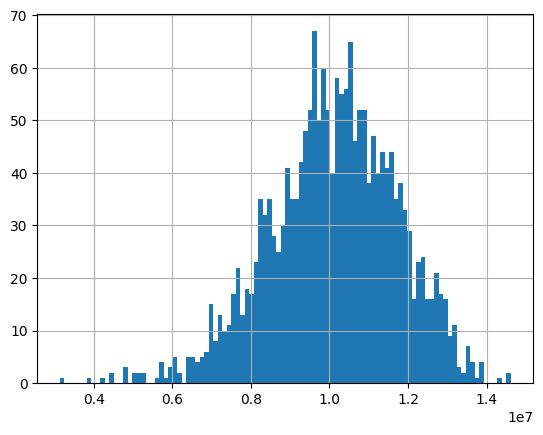

In [46]:
df.Sensory.hist(bins=100)
plt.savefig("sensory.pdf", bbox_inches='tight')
df.Sensory.describe()

1895

## Percept

count    9.620000e+03
mean     4.408435e+06
std      1.605193e+06
min      6.414000e+03
25%      3.267177e+06
50%      4.324660e+06
75%      5.436388e+06
max      1.324877e+07
Name: Percept, dtype: float64

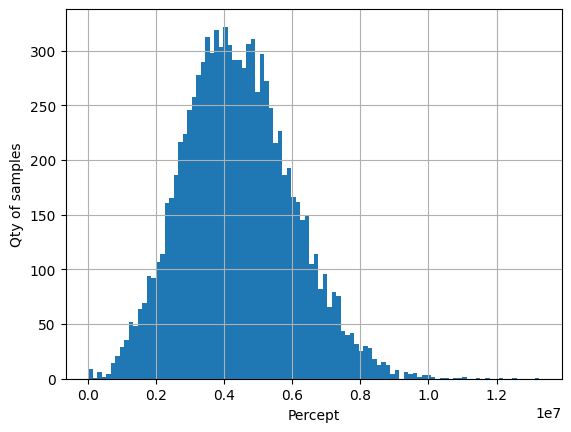

In [11]:
ax = df.Percept.hist(bins=100)
ax.set(xlabel='Percept', ylabel='Qty of samples')
plt.savefig("percept.pdf", bbox_inches='tight')
df.Percept.describe()

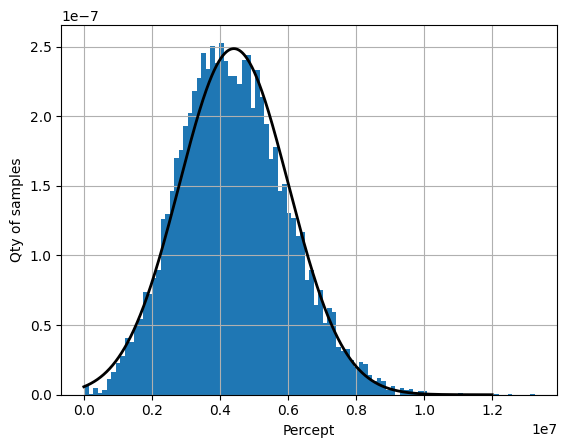

In [12]:
ax = df.Percept.hist(bins=100, density=True)
ax.set(xlabel='Percept', ylabel='Qty of samples')
x=np.arange(12*10**6)
m = df.Percept.mean()
s = df.Percept.std() 
p = norm.pdf(x,m, s)
#p = lognorm.pdf(x, s=s, scale=m)
plt.plot(x, p, 'k', linewidth=2)
plt.savefig("percept_gauss.pdf", bbox_inches='tight')


Температура по больнице 4408435, cтандартное отклонение 1605193. Распредедение не нормальное (плотность нормального показана черной линией), явный тослтый хвост справа, по-этому среднее не совпадает с пиком. То есть скорее всего, тут смесь разных групп пользователей с разными средними (как гипотезы, например, усидчивые/не усидчивые, дальтоники/не дальтоники, "насмотренные"/"не насмотренные"). 

## Time

count    9620.000000
mean      426.860564
std       329.992883
min       150.001515
25%       245.957102
50%       332.102597
75%       483.863558
max      3591.146057
Name: Time, dtype: float64

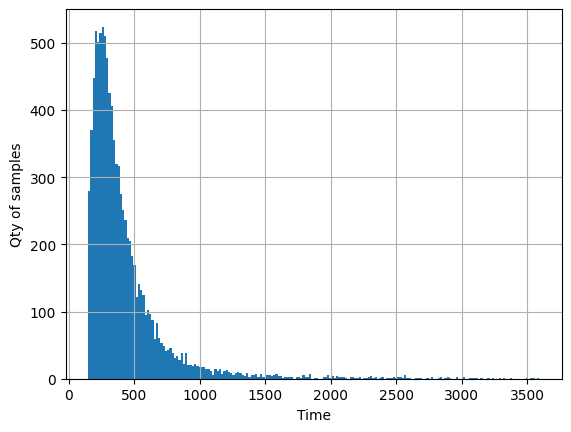

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats 
from scipy.optimize import leastsq

ax = df.Time.hist(bins=200)
ax.set(xlabel='Time', ylabel='Qty of samples')
plt.savefig("time.pdf", bbox_inches='tight')
df.Time.describe()

В среднем пользователь тратит на прохождения теста 427 секунды. Пик примерно в 260 секунд. 

1.15080853050577 150.00073030366633 240.70924424091697


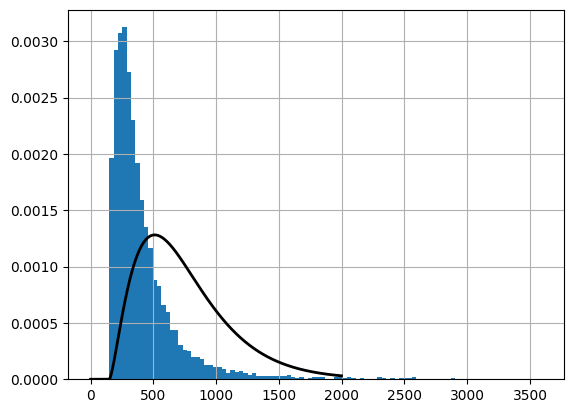

In [14]:
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(df.Time)
print(fit_alpha, fit_loc, fit_beta)
df.Time.hist(bins=100, density = True)
x=np.arange(2000)
p = stats.gamma.pdf(x,a=2.5, loc=fit_loc, scale=fit_beta)
plt.plot(x, p, 'k', linewidth=2)

(0.8869749968708037, 133.4973043654228, 196.9783167806354)


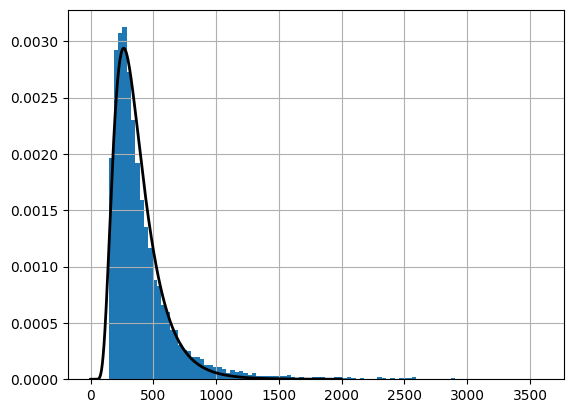

In [15]:
params = stats.lognorm.fit(df.Time)
print(params)
df.Time.hist(bins=100, density = True)
x=np.arange(2000)
p = stats.lognorm.pdf(x,0.5, 24.6, 307.7575479236227)
plt.plot(x, p, 'k', linewidth=2)

## Age

count    9620.000000
mean       32.659459
std        10.570760
min         4.000000
25%        25.000000
50%        31.000000
75%        38.000000
max       123.000000
Name: Age, dtype: float64

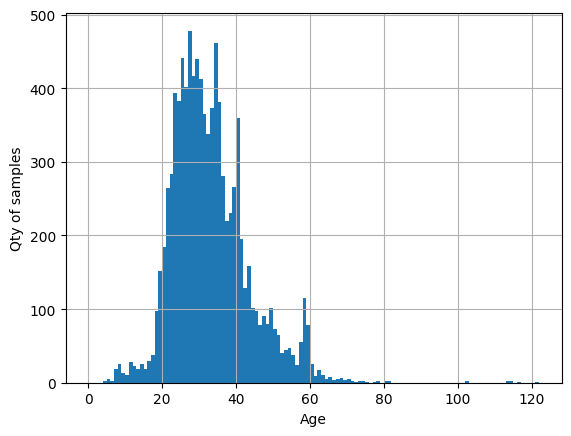

In [16]:
# Non-unique Age
ax = df.Age.hist(bins=range(123))
ax.set(xlabel='Age', ylabel='Qty of samples')
plt.savefig("age.pdf", bbox_inches='tight')

df.Age.describe()

Для возраста без учета уникальности пользователей получается очень странный график. Оказалось, это из-за повторных испытаний нескольких особенно настойчивых пользователей.

In [17]:
# Unique Age
df_age = df.groupby(['User']).agg({'Age':['mean', 'min', 'max']})
df_contradict_age = df_age[(df_age[('Age',  'max')] - df_age[('Age',  'min')]) != 0]
df_contradict_age

Age        
                                   mean min max
User                                           
07Py2iiwQfX2ztTXJzvPPazldwo1  32.333333  17  41
0FsHb00Y2RTeKY9y465APULkLPN2  26.500000  25  28
0XH3GI0apvgjGUjP15Y7C3bRBKh1  21.666667  21  22
0YofamYOgxRmXE8TNkwtlOu3eiI3  34.000000  17  43
0dihCUGjetZLf9TeC7J6MGJPuJO2  30.333333  11  40
...                                 ...  ..  ..
zX1bNxmTDTPUf3Sgc0xmEGJRQdB2  45.666667  37  50
zZ4LzTDfCLQxY9Lv3LiG7313XSY2  32.500000  29  36
zjwqtEsvfuYQcMEdOQe1osRiO2D2  29.333333  23  42
zpugtknTvxUpXWi090LRYtHya433  42.666667  41  46
zup0c5kgXtVN1W6unbgsBmo2OHH3  28.000000  14  42

[640 rows x 3 columns]

In [18]:
len(df) - len(df_age), (len(df) - len(df_age))*100/len(df)

(4135, 42.983367983367984)

Если смотреть только по полю User, 4135 испытаний - повторные. В 649 случаях для повторных испытаний указан другой возраст.
Будем считать что одним аккаунтом воспользовалось несколько человек и уникальный идентификатор испытуемого на самом деле (User, Age), а не тол (допустим, что ситуацией с одногодками-пользователями одного аккаунта можно принебречь). Получилось 6364 уникальных испытуемых.

6364
Age
4        3
5        3
6        2
7       10
8       12
9        8
10      10
11      16
12      16
13      16
14      14
15      16
16      22
17      31
18      59
19     105
20     137
21     184
22     203
23     265
24     266
25     314
26     277
27     330
28     295
29     303
30     305
31     279
32     254
33     248
34     243
35     244
36     186
37     163
38     155
39     156
40     136
41     116
42     103
43     101
44      73
45      70
46      55
47      64
48      57
49      51
50      43
51      39
52      33
53      39
54      28
55      25
56      17
57      29
58      21
59      16
60      15
61       5
62      15
63       7
64       4
65       8
66       4
67       3
68       7
69       3
70       4
71       2
72       1
73       3
74       2
75       1
77       1
78       2
80       1
81       2
102      1
113      2
114      2
116      1
122      1
123      1
Name: Age, dtype: int64


<Axes: xlabel='Age'>

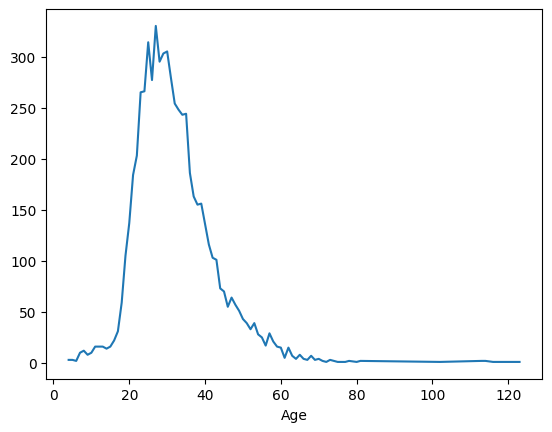

In [19]:
df_age = df.groupby(['User', 'Age'], as_index=False).min()
print(len(df_age))
#df_age.columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_age.groupby(['Age']).Age.count())
df_age.groupby(['Age']).Age.count().plot()


count    6364.000000
mean       32.039755
std        10.348880
min         4.000000
25%        25.000000
50%        30.000000
75%        37.000000
max       123.000000
Name: Age, dtype: float64

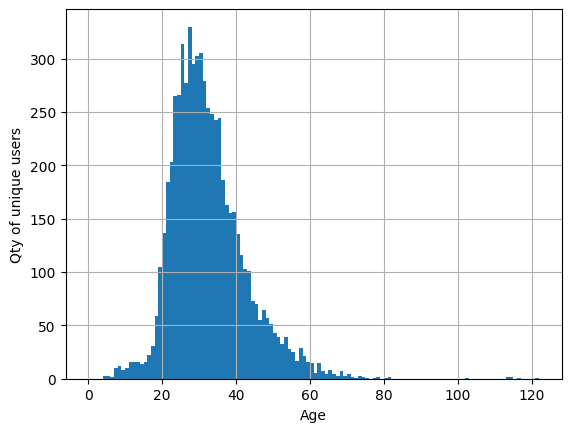

In [20]:
ax = df_age.Age.hist(bins=range(123))
ax.set(xlabel='Age', ylabel='Qty of unique users')
plt.savefig("age_unique.pdf", bbox_inches='tight')
df_age.Age.describe()

Получился довольно вменяемый график.
Средний возраст 32 года, больше всего испытаний (330) провели 27-летние, также много 25-летних (314), а между ними небольшой провал - может из-за способа перевода года рождения в возраст?

## Tries (число попыток)

In [21]:
df['Try'] = df.sort_values("Stamp").groupby(['User', 'Age']).cumcount()+1
df_user_tries = df.sort_values("Stamp").groupby(['User', 'Age'], as_index=False).Try.max()

/var/folders/f6/g7d4zfrx651gh_cd970d525m0000gn/T/ipykernel_33206/1620920772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Try'] = df.sort_values("Stamp").groupby(['User', 'Age']).cumcount()+1


count    6364.000000
mean        1.511628
std         3.099334
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       165.000000
Name: Try, dtype: float64

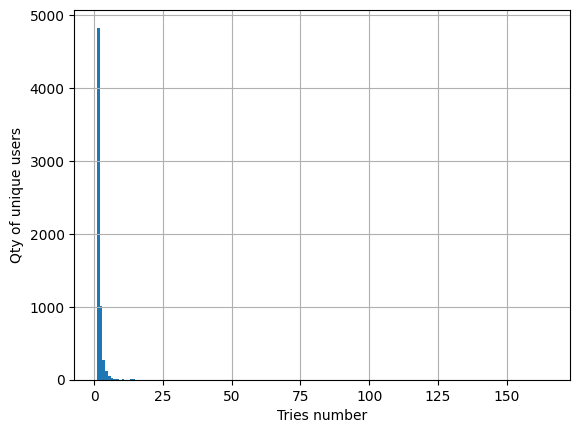

In [22]:
ax=df_user_tries.Try.hist(bins=165)
ax.set(xlabel='Tries number', ylabel='Qty of unique users')
plt.savefig("tries.pdf", bbox_inches='tight')
df_user_tries.Try.describe()

In [23]:
df_user_tries.groupby(by=['Try']).count()

,User,Age
Try,,
1,4829,4829
2,1006,1006
3,271,271
4,123,123
5,54,54
6,27,27
7,8,8
8,9,9
9,3,3


In [24]:
sum(df_user_tries.Try==1), sum(df_user_tries.Try==2), sum(df_user_tries.Try==3), sum(df_user_tries.Try>25)

(4829, 1006, 271, 7)

Число попыток падает экспоненциально. В среднем, каждый пользователь сделал 1.5 попытки.
Из 6364 пользователей, 4829 сделали только одну попытку, 1006 - две, 271 - три, итд.
7 человек сделали больше 25 попыток, а один из них - 165 (максимум)

## Time/Percept dependency

SignificanceResult(statistic=0.13477237606058967, pvalue=3.122937043487097e-40)
PearsonRResult(statistic=0.10875785777052546, pvalue=1.0455923895157372e-26)


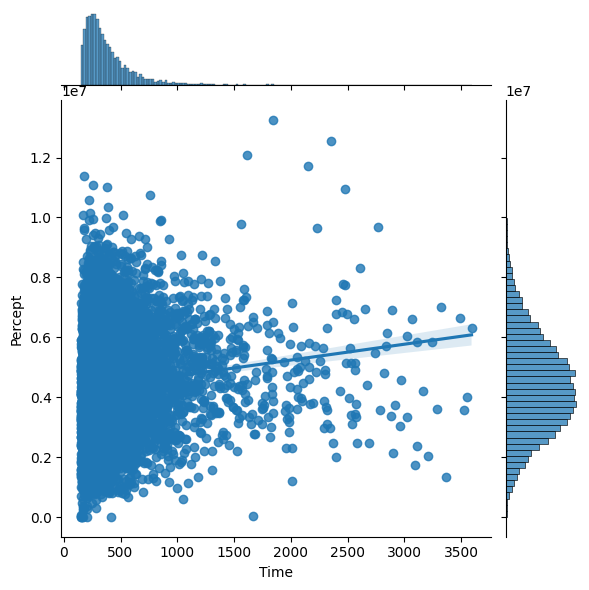

In [25]:
g = sns.JointGrid(data=df, x="Time", y="Percept")
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot)
plt.savefig("time_percept_scatter.pdf", bbox_inches='tight')

print(scipy.stats.spearmanr(df.Time, df.Percept))
print(scipy.stats.pearsonr(df.Time, df.Percept))

/var/folders/f6/g7d4zfrx651gh_cd970d525m0000gn/T/ipykernel_33206/3097689272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeGroup'] = pd.cut(df.Time, bins=20)


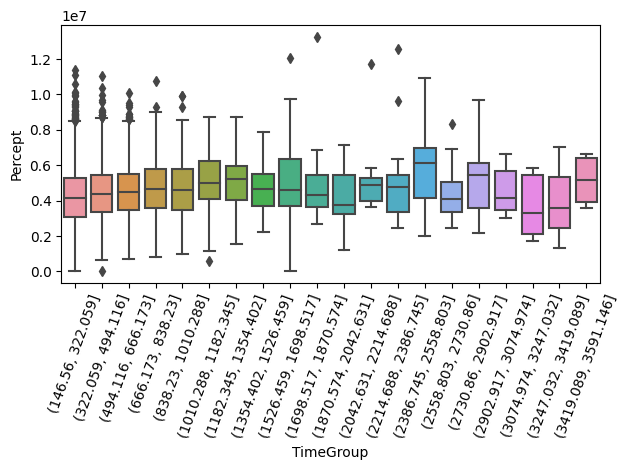

In [26]:
df['TimeGroup'] = pd.cut(df.Time, bins=20)
sns.boxplot(data=df, x="TimeGroup", y="Percept")
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig("time_percept_boxes.pdf", bbox_inches='tight')


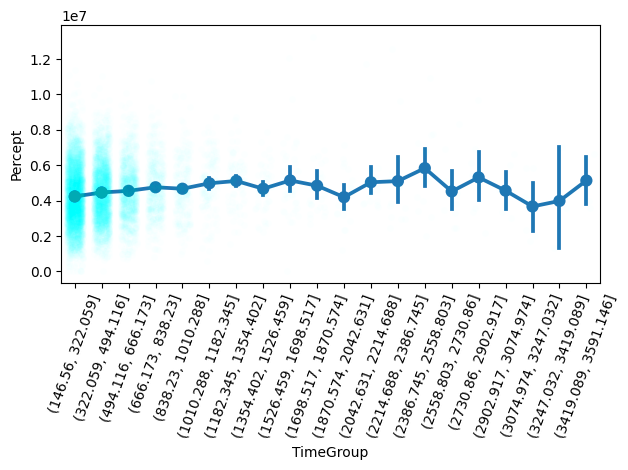

In [27]:
sns.stripplot(data=df, x="TimeGroup", y="Percept", jitter=.3, color="cyan", alpha=.01)
sns.pointplot(data=df, x="TimeGroup", y="Percept")
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig("time_percept_conf.pdf", bbox_inches='tight')


In [28]:
df_time_intervals = df.groupby(by=['TimeGroup']).agg({'Percept':['mean', 'std', 'count']})
df_time_intervals

Percept                    
                              mean           std count
TimeGroup                                             
(146.56, 322.059]     4.237932e+06  1.615640e+06  4570
(322.059, 494.116]    4.460926e+06  1.553843e+06  2757
(494.116, 666.173]    4.554633e+06  1.542457e+06  1129
(666.173, 838.23]     4.756707e+06  1.565032e+06   480
(838.23, 1010.288]    4.673700e+06  1.619905e+06   245
(1010.288, 1182.345]  4.981758e+06  1.633355e+06   131
(1182.345, 1354.402]  5.112899e+06  1.432005e+06    85
(1354.402, 1526.459]  4.673200e+06  1.321596e+06    50
(1526.459, 1698.517]  5.141430e+06  2.122181e+06    39
(1698.517, 1870.574]  4.845514e+06  2.058993e+06    27
(1870.574, 2042.631]  4.196523e+06  1.592941e+06    19
(2042.631, 2214.688]  5.039493e+06  1.764331e+06    19
(2214.688, 2386.745]  5.103399e+06  2.729187e+06    15
(2386.745, 2558.803]  5.835101e+06  2.222117e+06    16
(2558.803, 2730.86]   4.521237e+06  1.893464e+06    10
(2730.86, 2902.917]   5.313299e+06  2.220659e+06     9
(2902.917, 3074.974]  4.565215e+06  1.473669e+06     6
(3074.974, 3247.032]  3.672708e+06  1.888935e+06     6
(3247.032, 3419.089]  3.984337e+06  2.859481e+06     3
(3419.089, 3591.146]  5.136720e+06  1.572557e+06     4

Percept зависит от Time статистически значимо (вероятность принятия "0-гипотезы" о независимости практически равна 0). Но непараметрический коэфициент корреляции spearman-rho равен 0.13, то есть связь очень слабая и не объясняет бОльшую часть вариативности Percept. При изменении Time от начала (диапазон до 322 секунд) до диапазона (1182.345, 1354.402] среднее Percept устойчиво растет в итоге увеличиваясь на 20%: от 4237932 до 5112899. Для дальнейших временных интервалов, количество испытаний не достаточно (< 50) и разброс значений велик.
Кстати, с увеличением Time в этом диапазоне (до 1354), уменьшается дисперсия, то есть, у проходящих тест дольше, результаты - более однородные.

In [29]:
(5112899-4237932)/4237932

0.20646083986246122

## Age/Percept dependency

SignificanceResult(statistic=0.0805289640847783, pvalue=2.5690983207589435e-15)
PearsonRResult(statistic=0.07988801767808207, pvalue=4.258696484546649e-15)


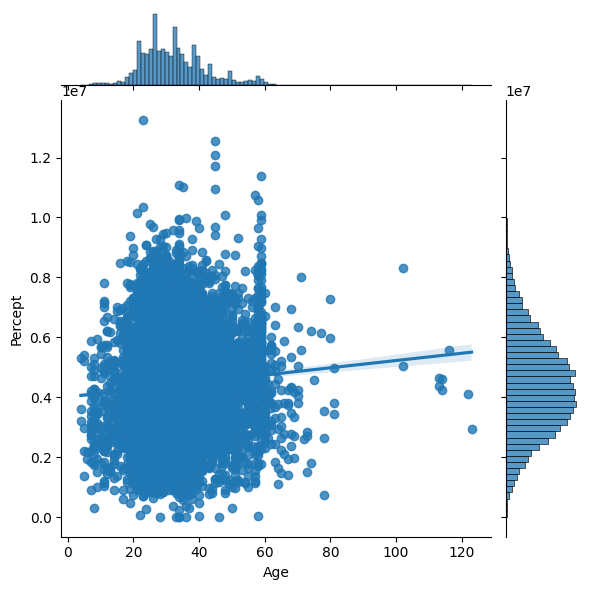

In [30]:
g = sns.JointGrid(data=df, x="Age", y="Percept")
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot)
plt.savefig("age_percept_scatter.pdf", bbox_inches='tight')

print(scipy.stats.spearmanr(df.Age, df.Percept))
print(scipy.stats.pearsonr(df.Age, df.Percept))

/var/folders/f6/g7d4zfrx651gh_cd970d525m0000gn/T/ipykernel_33206/1973870916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup'] = pd.cut(df.Age, bins=10)


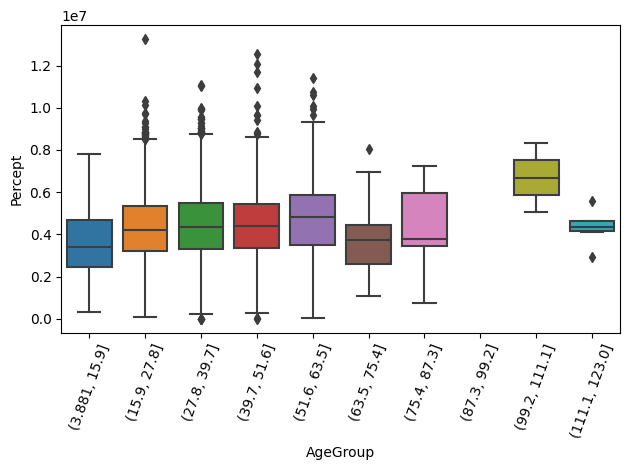

In [31]:
df['AgeGroup'] = pd.cut(df.Age, bins=10)
sns.boxplot(data=df, x="AgeGroup", y="Percept")
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig("age_percept_boxes.pdf", bbox_inches='tight')


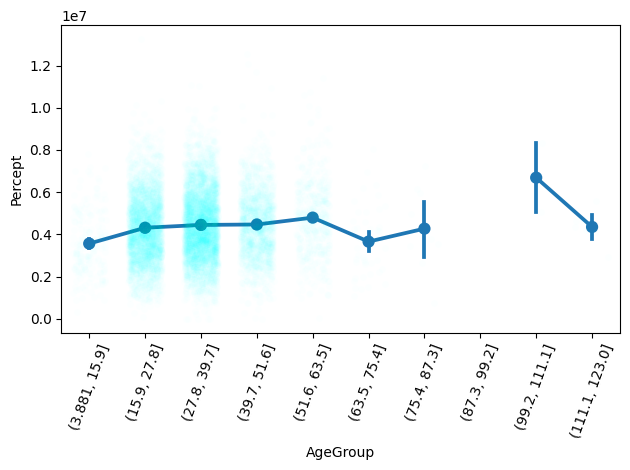

In [32]:
sns.stripplot(data=df, x="AgeGroup", y="Percept", jitter=.3, color="cyan", alpha=.01)
sns.pointplot(data=df, x="AgeGroup", y="Percept")
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig("age_percept_conf.pdf", bbox_inches='tight')


In [33]:
df_age_intervals = df.groupby(by=['AgeGroup']).agg({'Percept':['mean', 'std', 'count']})
df_age_intervals

Percept                    
                        mean           std count
AgeGroup                                        
(3.881, 15.9]   3.568599e+06  1.503847e+06   192
(15.9, 27.8]    4.318264e+06  1.572595e+06  3146
(27.8, 39.7]    4.452155e+06  1.605426e+06  4184
(39.7, 51.6]    4.472653e+06  1.581038e+06  1530
(51.6, 63.5]    4.797792e+06  1.745152e+06   503
(63.5, 75.4]    3.661667e+06  1.566424e+06    47
(75.4, 87.3]    4.276139e+06  2.015827e+06     9
(87.3, 99.2]             NaN           NaN     0
(99.2, 111.1]   6.690204e+06  2.316451e+06     2
(111.1, 123.0]  4.355623e+06  7.966844e+05     7

Percept зависит от Age статистически значимо (вероятность принятия "0-гипотезы" о независимости практически равна 0). Но корреляция еще меньше, непараметрический коэфициент корреляции spearman-rho равен 0.08, то есть связь очень слабая и не объясняет бОльшую часть вариативности Percept. При изменении Age от начала (диапазон до 16 лет) до диапазона (51.6, 63.5] среднее Percept устойчиво растет в итоге увеличиваясь на 34%: от 3568599 до 4797792. Для возрастов > 63.5,  количество данных резко сокращается.
Остается вопрос, может быть с возврастом люди просто дольше выполняют тест, и важно только время?

In [34]:
(4797792 - 3568599)/3568599

0.3444469384203717

# Age/Time dependency

SignificanceResult(statistic=0.07420050815895358, pvalue=3.173923173995992e-13)
PearsonRResult(statistic=0.02769878361030495, pvalue=0.006589468476990055)


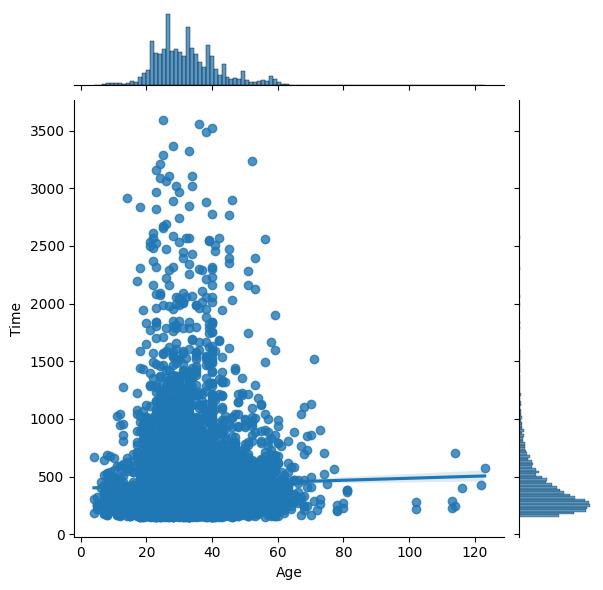

In [35]:
g = sns.JointGrid(data=df, x="Age", y="Time")
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot)
plt.savefig("age_time_scatter.pdf", bbox_inches='tight')

print(scipy.stats.spearmanr(df.Age, df.Time))
print(scipy.stats.pearsonr(df.Age, df.Time))

да, небольшая зависимость Time от Age есть.

young_fast 2211 4096246.920850294
SignificanceResult(statistic=0.07952034646055724, pvalue=0.00018186399946263713)
PearsonRResult(statistic=0.11606711372706291, pvalue=4.423720153747563e-08)
young_slow 1983 4516047.820978316
SignificanceResult(statistic=0.06431339307102679, pvalue=0.004168867194720669)
PearsonRResult(statistic=0.08257115042607172, pvalue=0.0002323801327609081)
old_fast 2595 4374627.250867052
SignificanceResult(statistic=0.09085542074343418, pvalue=3.5583664245222067e-06)
PearsonRResult(statistic=0.09352754231231773, pvalue=1.8189135496246275e-06)
old_slow 2831 4607864.894736842
SignificanceResult(statistic=-0.01611735906746358, pvalue=0.39131470704391846)
PearsonRResult(statistic=-0.026153681635908196, pvalue=0.16416901343481807)


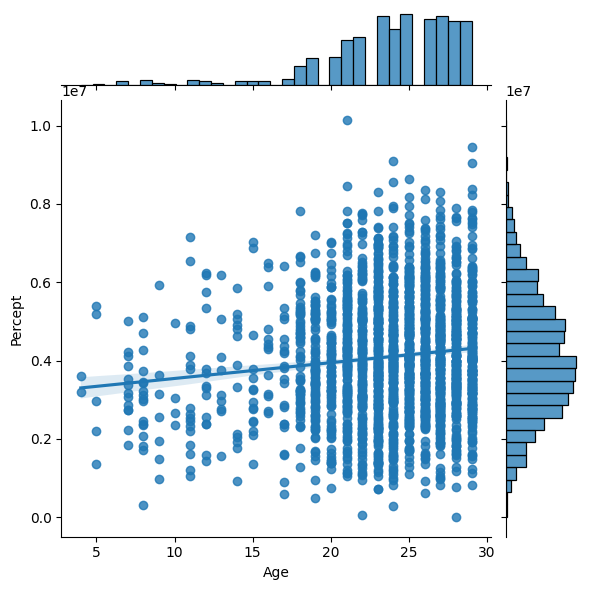

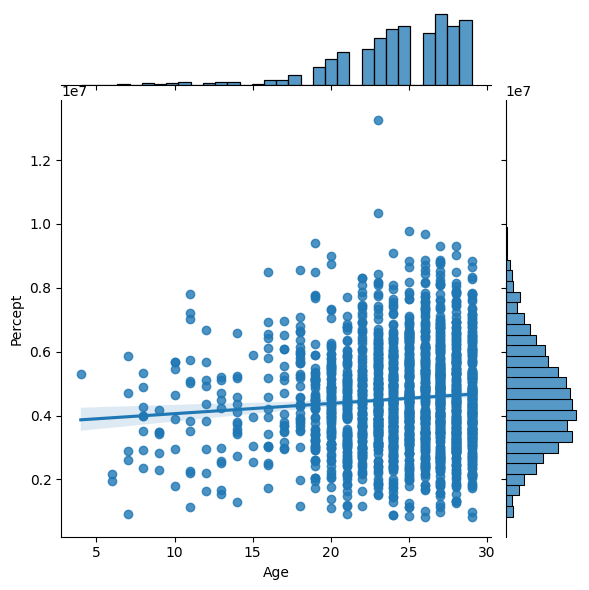

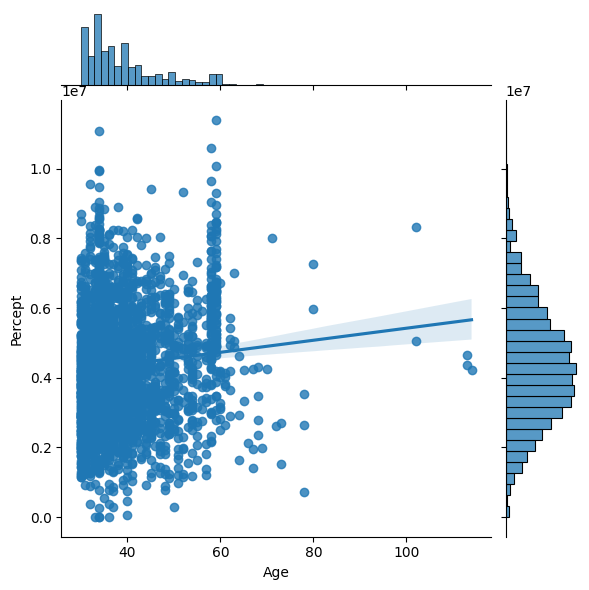

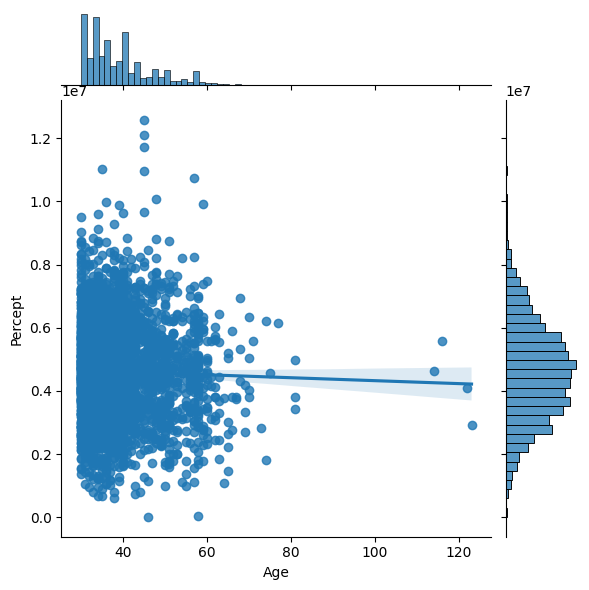

In [36]:
# Age: 30
# Time:332
df_young_fast = df[(df.Age<30) & (df.Time<332)]
df_young_slow = df[(df.Age<30) & (df.Time>=332)]
df_old_fast = df[(df.Age>=30) & (df.Time<332)]
df_old_slow = df[(df.Age>=30) & (df.Time>=332)]

def corr_percept(df, df_name):
    g = sns.JointGrid(data=df, x="Age", y="Percept")
    g.plot_joint(sns.regplot)
    g.plot_marginals(sns.histplot)
    plt.savefig(f"age_time_scatter_{df_name}.pdf", bbox_inches='tight')
    print(df_name, len(df), df.Percept.mean())
    print(scipy.stats.spearmanr(df.Age, df.Percept))
    print(scipy.stats.pearsonr(df.Age, df.Percept))
    
corr_percept(df_young_fast, "young_fast")
corr_percept(df_young_slow, "young_slow")
corr_percept(df_old_fast, "old_fast")
corr_percept(df_old_slow, "old_slow")


In [37]:
4374627-4096246, 4607864-4516047

(278381, 91817)

Мы разбили сэмплы на 4 группы используя медианы: 30 лет и 332 секунды как границы "водораздела":

df_young_fast Age<30, Time<332
df_young_slow Age<30, Time>=332
df_old_fast Age>=30, Time<332
df_old_slow df.Age>=30, Time>=332

Действительно, молодые больше отвечают быстро, а "старые" медленно.
Но среднее Percept в обоих взрослых (>=30) группах оказалось больше среднего в соответсвующих молодых (<30)
разность old-young fast: 278381
разность old-young slow: 91817
Это аргумент в пользу гипотезы,
что у взрослых есть преимущество не зависящее от медленного отвечания.

Еще интереснее то, что в "быстрых" группах сохраняется корреляция от возраста, особенно во взрослой быстрой группе. А в "медленных" группах эта корреляция меньше и высока вероятность 0-гипотезы (о независимости),
особенно в old_slow. Если учесть, что разница между средними old_slow и young_slow не велика, можно
предположить, что при slow ответах опыт не так важен, как умение "подкруитить" GUI. В общем,
действуют разные механизмы.
Может как-то переделать эксперимент, чтобы ответы были более интуитивными?
отграничить время ответов, например.



/var/folders/f6/g7d4zfrx651gh_cd970d525m0000gn/T/ipykernel_33206/380827775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeSplit'] = ['>=30' if x >= 30 else "<30" for x in df.Age]
/var/folders/f6/g7d4zfrx651gh_cd970d525m0000gn/T/ipykernel_33206/380827775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeGroup2'] = pd.qcut(df.Time, q=[0, .25, .5, .75, 1])


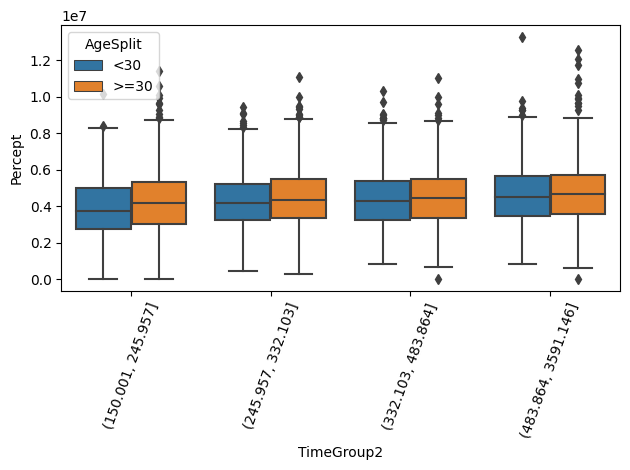

In [38]:
#Violin plots by age
df['AgeSplit'] = ['>=30' if x >= 30 else "<30" for x in df.Age]
#df['Senior'] = df.Age >= 30
df['TimeGroup2'] = pd.qcut(df.Time, q=[0, .25, .5, .75, 1])
sns.boxplot(data=df, x="TimeGroup2", y="Percept", hue="AgeSplit", hue_order=["<30", ">=30"])
plt.xticks(rotation=70)
plt.tight_layout()
#sns.violinplot(data=df, x="class", y="age", hue="alive", split=True, inner="quart")
plt.savefig("age_split_quartiles.pdf", bbox_inches='tight')


/var/folders/f6/g7d4zfrx651gh_cd970d525m0000gn/T/ipykernel_33206/3509918432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup2'] = pd.qcut(df.Age, q=[0, .25, .5, .75, 1])
/var/folders/f6/g7d4zfrx651gh_cd970d525m0000gn/T/ipykernel_33206/3509918432.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeGroup2'] = pd.qcut(df.Time, q=[0, .25, .5, .75, 1])


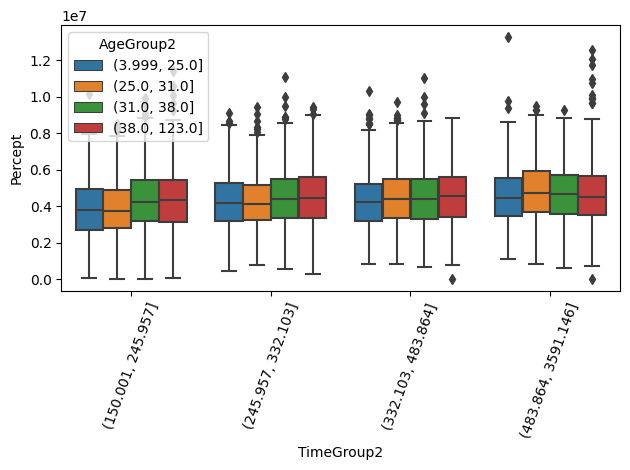

In [108]:
#Violin plots by age
df['AgeGroup2'] = pd.qcut(df.Age, q=[0, .25, .5, .75, 1])
#df['Senior'] = df.Age >= 30
df['TimeGroup2'] = pd.qcut(df.Time, q=[0, .25, .5, .75, 1])
sns.boxplot(data=df, x="TimeGroup2", y="Percept", hue="AgeGroup2")
plt.xticks(rotation=70)
plt.tight_layout()
#sns.violinplot(data=df, x="class", y="age", hue="alive", split=True, inner="quart")
plt.savefig("age_split_quartiles.pdf", bbox_inches='tight')


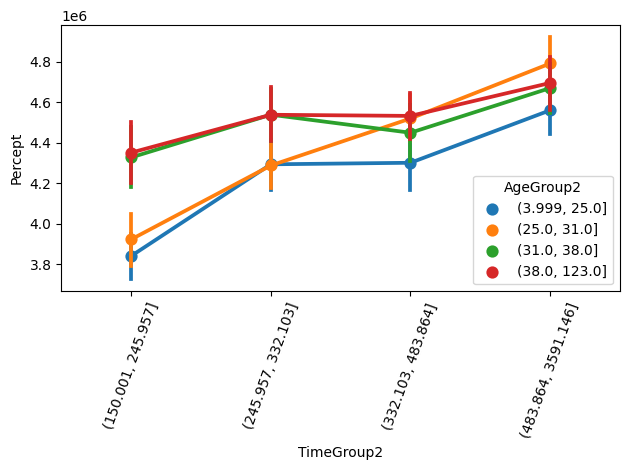

In [109]:
sns.pointplot(data=df, x="TimeGroup2", y="Percept", hue="AgeGroup2")
plt.xticks(rotation=70)
plt.tight_layout()
#sns.violinplot(data=df, x="class", y="age", hue="alive", split=True, inner="quart")
plt.savefig("age_split_points.pdf", bbox_inches='tight')


2786
[(450, 550], (150, 250], (250, 350], (350, 450]]
Categories (4, interval[int64, right]): [(150, 250] < (250, 350] < (350, 450] < (450, 550]]
[(30.0, 40.0], (40.0, 50.0], (20.0, 30.0], NaN]
Categories (3, interval[int64, right]): [(20, 30] < (30, 40] < (40, 50]]


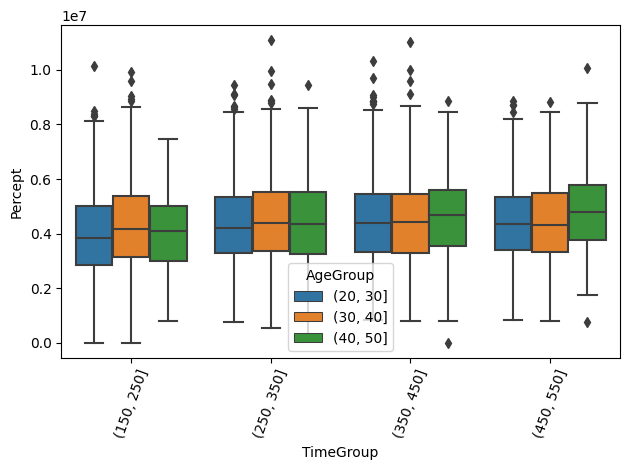

In [103]:
# cutting tails...
df_salient = df.copy(deep=True)
df_salient = df_salient[(df_salient.Age>=20) & (df_salient.Age<=50) &(df_salient.Time>=150) & (df_salient.Time<=550)]
print(len(df) - len(df_salient))
df_salient['TimeGroup'] = pd.cut(df_salient.Time, bins=range(150,551,100))
print(df_salient['TimeGroup'].unique())
df_salient['AgeGroup'] = pd.cut(df_salient.Age, bins=range(20,51,10))
print(df_salient['AgeGroup'].unique())

sns.boxplot(data=df_salient, x="TimeGroup", y="Percept", hue="AgeGroup")
plt.xticks(rotation=70)
plt.tight_layout()
#sns.violinplot(data=df, x="class", y="age", hue="alive", split=True, inner="quart")
plt.savefig("age_split_salient.pdf", bbox_inches='tight')


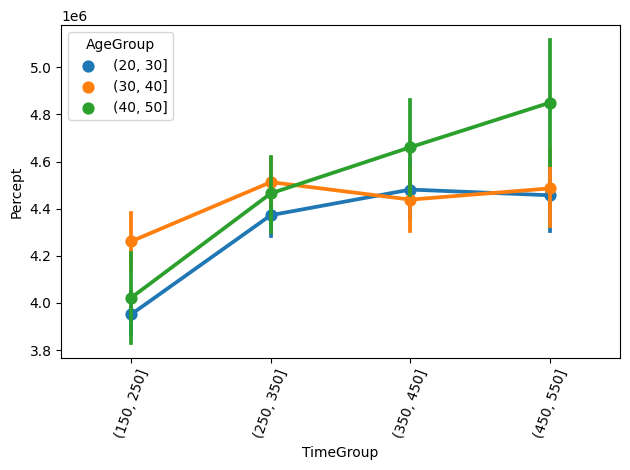

In [104]:
#sns.stripplot(data=df_salient, x="TimeGroup", y="Percept", jitter=.3, color="cyan", alpha=.01)
sns.pointplot(data=df_salient, x="TimeGroup", y="Percept", hue="AgeGroup")
plt.xticks(rotation=70)
plt.tight_layout()
#sns.violinplot(data=df, x="class", y="age", hue="alive", split=True, inner="quart")
plt.savefig("age_split_salient_points.pdf", bbox_inches='tight')


## Percept/Try dependency

### Outliers

In [642]:
def plot_user(user, age):
    df_user = df[(df.User == user) & (df.Age == age)]
    sns.lineplot(data=df_user, x="Try", y="Percept")
    plt.savefig(f"increase_{user}.pdf", bbox_inches='tight')
    
df_user_tries[df_user_tries.Try>25]

,User,Age,Try
250,2F83U7auBggKnSbeya7DBXoyDRu1,34,121
251,2F83U7auBggKnSbeya7DBXoyDRu1,35,31
253,2F83U7auBggKnSbeya7DBXoyDRu1,58,70
254,2F83U7auBggKnSbeya7DBXoyDRu1,59,60
4098,dZgbLpt1xJeW84FksWl3BRrRWnw2,40,165
5695,tbAWsO0vmwczEAcLF0mr8ndlh943,38,29
6034,x0kYWjVPsgXeeV9izd2z5FZeuEf2,23,32


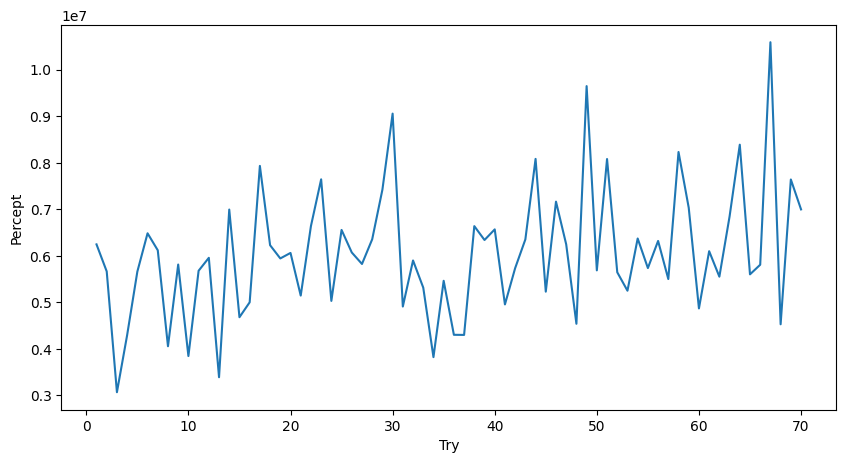

In [643]:
# example of improving line
plot_user("2F83U7auBggKnSbeya7DBXoyDRu1", 58)


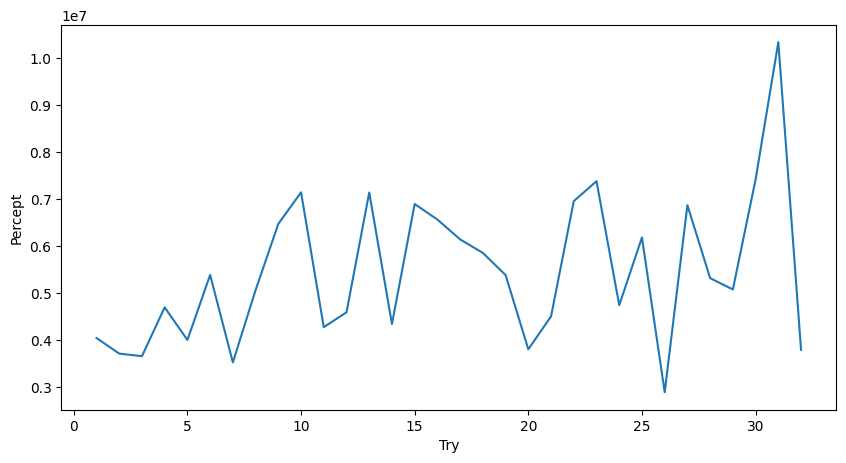

In [644]:
plot_user("x0kYWjVPsgXeeV9izd2z5FZeuEf2", 23)

### Consider only tries from 0 to 25.

9287


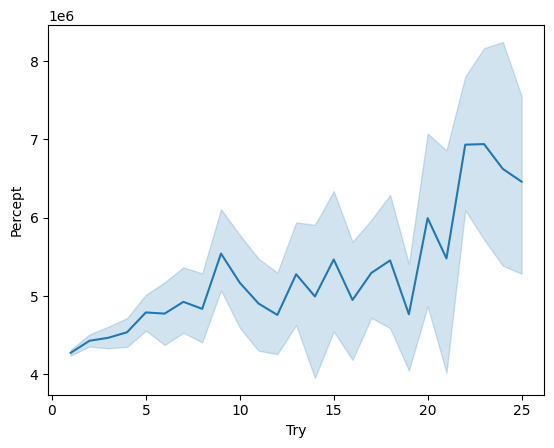

In [38]:
df25=df[df.Try<=25]
print(len(df25))
sns.lineplot(data=df25, x="Try", y="Percept")
plt.savefig("tries25.pdf", bbox_inches='tight')

8821


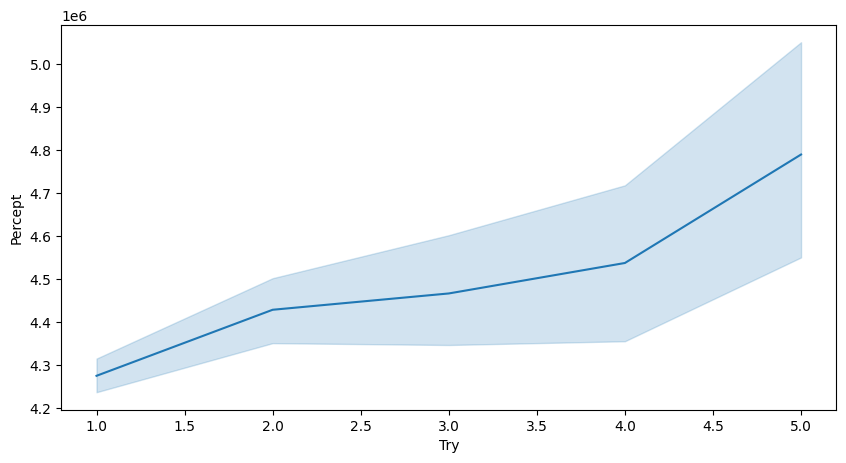

In [653]:
df5=df[df.Try<=5]
print(len(df5))
sns.lineplot(data=df5, x="Try", y="Percept")
plt.savefig("tries5.pdf", bbox_inches='tight')

C увеличением числа попыток, среднее значение Percept имеет устойчивую тенденцию к росту до 5-й попытки. А потом - у нас не достаточно данных (для 6: 27, затем: 8,9,7,3,1,2...)